## **Mediation Analysis**
---

## Input

### Libraries

In [1]:
# Library
spsm <- suppressPackageStartupMessages 
spsm(library(dplyr))
spsm(library(tidyverse))
spsm(library(FactoMineR))
spsm(library(ggplot2))
spsm(library(factoextra))
spsm(library(corrplot))
spsm(library(mediation))
spsm(library(mosaic))
spsm(library(kableExtra))
spsm(library(IRdisplay))
spsm(library(vioplot))

### Ext. Functions

In [2]:
# Function
source("../../utils/getData.R")
source("../../utils/getPCs.R")
source("../../utils/getPermut.R")
source("../../utils/getMediationTable.R")

### Load data at 12-month

In [3]:
# example: dat <- getData("../../../data/", 1)
# options: 1: "SummaryMonths1to4.csv"
#          2: "SummaryMonths1to12.csv"
#          3: "SummaryMonths5to12Weight.csv
#          4: "SummaryMonths5to12All.csv"
pathFile <- c("../../../data/")
numFile <- 2
dat <- getData(pathFile, numFile)

In [4]:
names(dat)

[1] "id"                            "WeightLoss4Month"             
 [3] "WeightLoss12Month"             "Class4Month"                  
 [5] "Class12Month"                  "Treatment"                    
 [7] "Age"                           "Gender"                       
 [9] "logInitialWeight"              "LoggedWeekendDays"            
[11] "LoggedWeekDays"                "NumWeigh"                     
[13] "TotalLoggedDays"               "TotalFoodDays"                
[15] "TotalExerciseDays"             "TotalBreakfastDays"           
[17] "TotalLunchDays"                "TotalDinnerDays"              
[19] "TotalSnackDays"                "AverageDailyIntakeCalories"   
[21] "AverageDailyExerciseCalories"  "AverageDailyBreakfastCalories"
[23] "AverageDailyLunchCalories"     "AverageDailyDinnerCalories"   
[25] "AverageDailySnackCalories"     "AvgTotalCal"                  
[27] "AvgBreakfastCal"               "AvgLunchCal"                  
[29] "AvgDinnerCal"                  "AvgSnackCal"

### Data description

The data variables used in our mediation analysis are described as follows:   
* *Treatment* is the treatment assignment variable, where it equals 0 for self-paced subjects and 1 for counselor-initiated subjects.  

* *WeightLoss12Month* is a log-ratio indicating the rate of weight change at four months with respect to the baseline weight. If the value is positive, it indicates a weight loss; if it is negative, it corresponds to gain, and 0 indicates no change between 12 months and baseline.

* *WeightLoss4Month* is a log-ratio indicating the rate of weight change at four months with respect to the baseline weight. If the value is positive, it indicates a weight loss; if it is negative, it corresponds to gain, and 0 indicates no change between 4 months and baseline. 

* The potential mediators that we plan to analyze are the *self-weighing* variable, the principal components derived from the electronically collected variables' PCA, and *WeightLoss4Month*. The logging variables quantify logging behavior in a number of days, and the caloric variables assess caloric intake and output. The logging and caloric variables are estimated over 12 months for the 12-month mediation analysis. The average caloric variables quantify the sum of the calories divided by the total number of logged days. For example, *AverageDailyBreakfastCalories* equals the sum of intake calories reported at breakfast divided by the total number of days when breakfast was logged.

   
| Logging            | Caloric                       |
|--------------------|-------------------------------|
| LoggedWeekendDays  | AverageDailyIntakeCalories    | 
| LoggedWeekDays     | AverageDailyExerciseCalories  |
| TotalLoggedDays    | AverageDailyBreakfastCalories |
| TotalFoodDays      | AverageDailyLunchCalories     |
| TotalExerciseDays  | AverageDailyDinnerCalories    |
| TotalBreakfastDays | AverageDailySnackCalories     |
| TotalLunchDays     |                               |
| TotalDinnerDays    |                               |
| TotalSnackDays     |                               |



---
## Principal Component Analysis

Applying a PCA (principal component analysis) reduces the number of variables and adresses the multicollinearity of the electronically collected variables.


### Variables selection

In [5]:
# Select the variable indexes to include in the Principal Component Analysis
myCols <-c("LoggedWeekDays", "LoggedWeekendDays", "TotalLoggedDays","TotalFoodDays",
            "TotalExerciseDays", 
            "TotalBreakfastDays", "TotalLunchDays", "TotalDinnerDays", "TotalSnackDays",
            "AverageDailyIntakeCalories", "AverageDailyExerciseCalories", 
            "AverageDailyBreakfastCalories",
            "AverageDailyLunchCalories", "AverageDailyDinnerCalories","AverageDailySnackCalories")
# Get the indexes of those variables
idxApp <- match(myCols, colnames(dat))

### Apply the PCA

In [6]:
# Get the results of PCA
resPC <- getPCs(dat, idxApp, numPCs = 3) # max numPCs is 5
# Get the data frame including the first three principal components named app1, app2, app3.
dat <- resPC$data

Registered S3 methods overwritten by 'car':
  method                          from
  influence.merMod                lme4
  cooks.distance.influence.merMod lme4
  dfbeta.influence.merMod         lme4
  dfbetas.influence.merMod        lme4



In [7]:
# Display the variables name
# print(names(dat))
# Select variables of interest
if (numFile == 1){
  myCols <-c("id","WeightLoss4Month", "Treatment", "Age", "NumWeigh", "App1", "App2", "App3")  
} else {
  myCols <-c("id","WeightLoss12Month", "WeightLoss4Month", "Treatment", "Age", "NumWeigh", "App1", "App2", "App3")      
}

myIdx <- match(myCols, colnames(dat))
dat <- dat[, myIdx]
print(names(dat))

[1] "id"                "WeightLoss12Month" "WeightLoss4Month" 
[4] "Treatment"         "Age"               "NumWeigh"         
[7] "App1"              "App2"              "App3"             


### Display PCA results

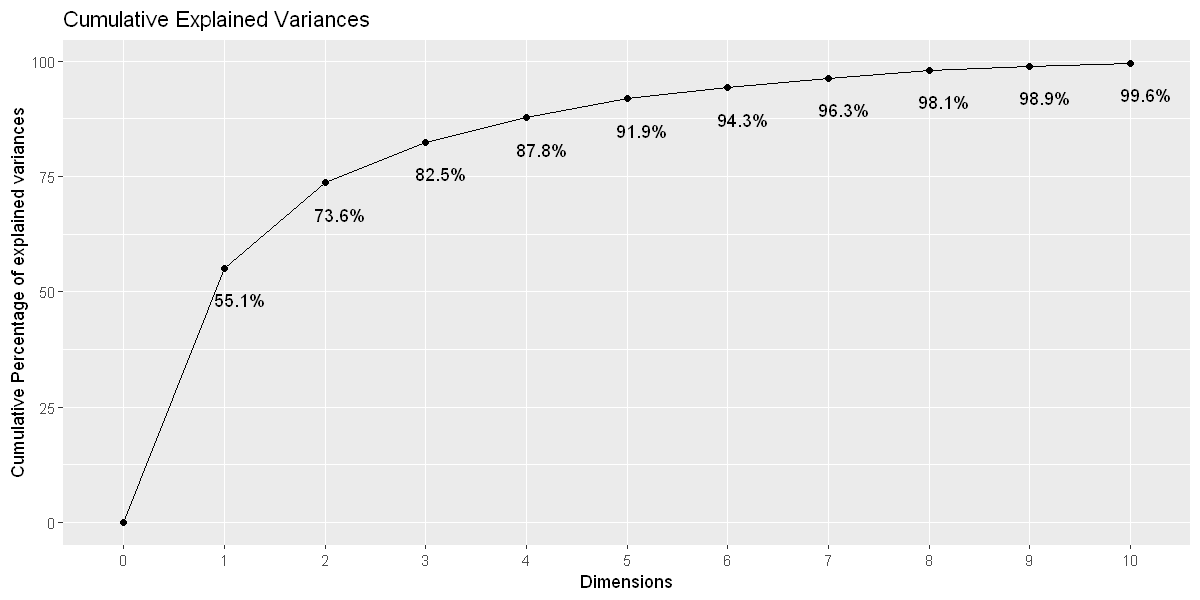

In [8]:
# resPC contains also the scree plot{scree.plot}, cumulative variance explained {CV.plot}, 
# the variables contribution of each component {contribCorr.plot()} and the quality of those 
# contributions {cos2Corr.plot()}.
options(repr.plot.width = 10, repr.plot.height = 5)
resPC$CV.plot

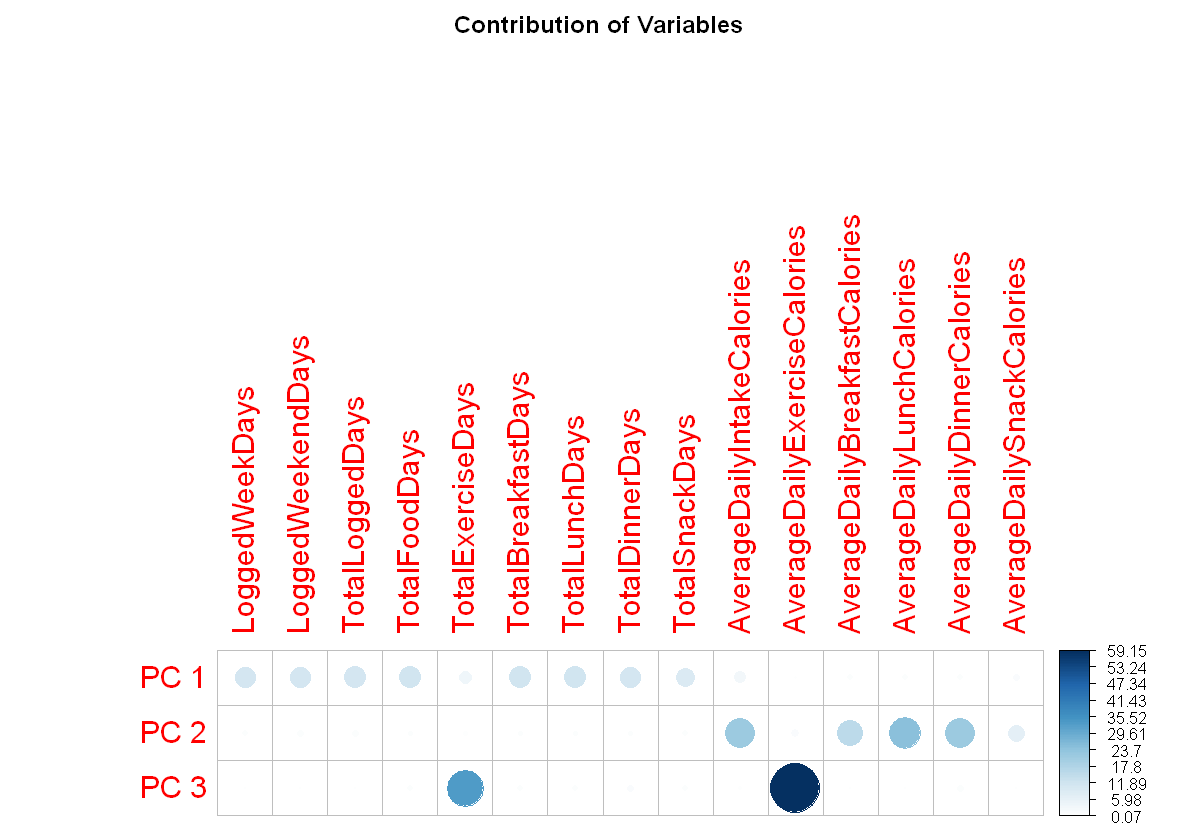

In [9]:
options(repr.plot.width = 10, repr.plot.height = 7)
resPC$contribCorr.plot(1.5) # to get numbers use resPC$contribCorrNum.plot()

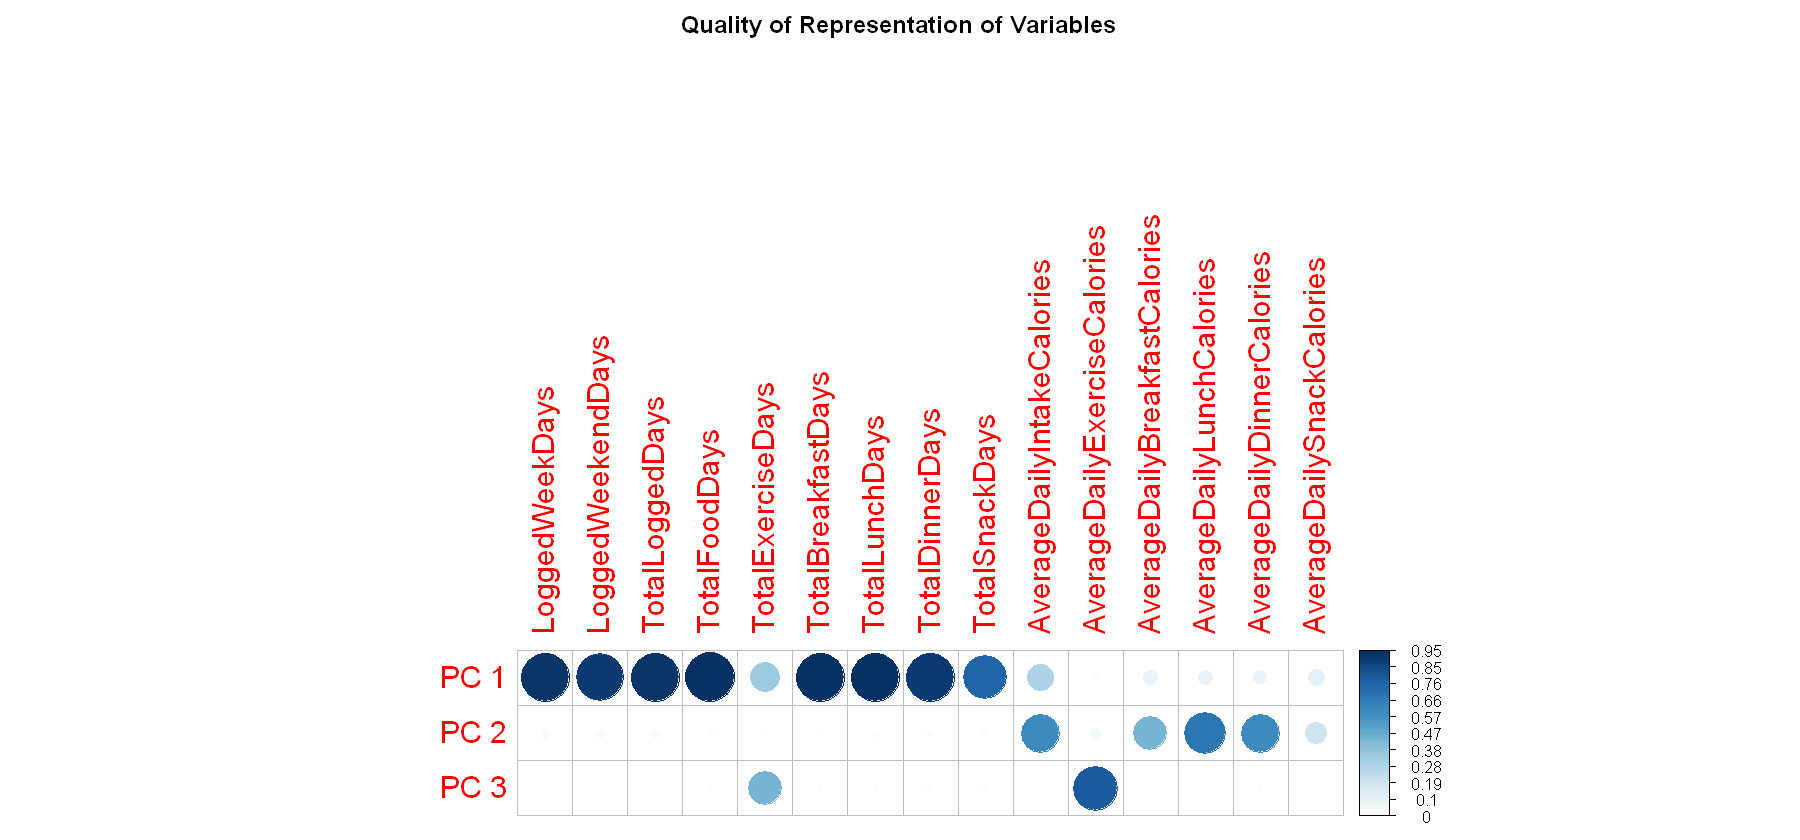

In [10]:
options(repr.plot.width = 15, repr.plot.height = 7)
resPC$cos2Corr.plot(1.5) # to get numbers use resPC$cos2CorrNum.plot()

---
## Analysis

The first step of the mediation analysis is to establish if our candidates variables are mediators or not.    
**To analyze the mediation we observe the following flowchart:**

![alt text](images/Mediation_flowchart.svg "Mediation Analysis flowchart")

**We first estimated two linear regressions for both the mediator and the outcome. We used also a permutation test to assess any associations with respect to our samples.**

**Clean the data:** *remove NA*

In [11]:
dat <- na.omit(dat)

---
### Relationship association assessment

We will consider the following assumptions:

* App usage and Number of self-weighing are casually unrelated mediators.
* Observed confounder is : age. 

#### **Regression of weight loss on the treatment.**

In [12]:
# Outcome model with confounders
out.fit <- lm(WeightLoss12Month ~ Treatment + Age, data = dat)
summary(out.fit)


Call:
lm(formula = WeightLoss12Month ~ Treatment + Age, data = dat)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.164341 -0.029560 -0.004966  0.032544  0.210613 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -0.0417484  0.0245211  -1.703  0.09110 . 
Treatment    0.0315668  0.0102142   3.090  0.00246 **
Age          0.0012699  0.0006829   1.860  0.06524 . 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.05657 on 127 degrees of freedom
Multiple R-squared:  0.1095,	Adjusted R-squared:  0.09552 
F-statistic: 7.812 on 2 and 127 DF,  p-value: 0.0006315


#### **Permutation test: Weight loss ~ treatment assignment**

The mean Weight Loss for intervention is: 0.0366197 
The mean Weight Loss for no intervention is: 0.001591016 
The absolute t-test statistic is:  3.450882 
Number of permutation sample: 10000 
P-value with t-test for 10000 samples is 6e-04 .


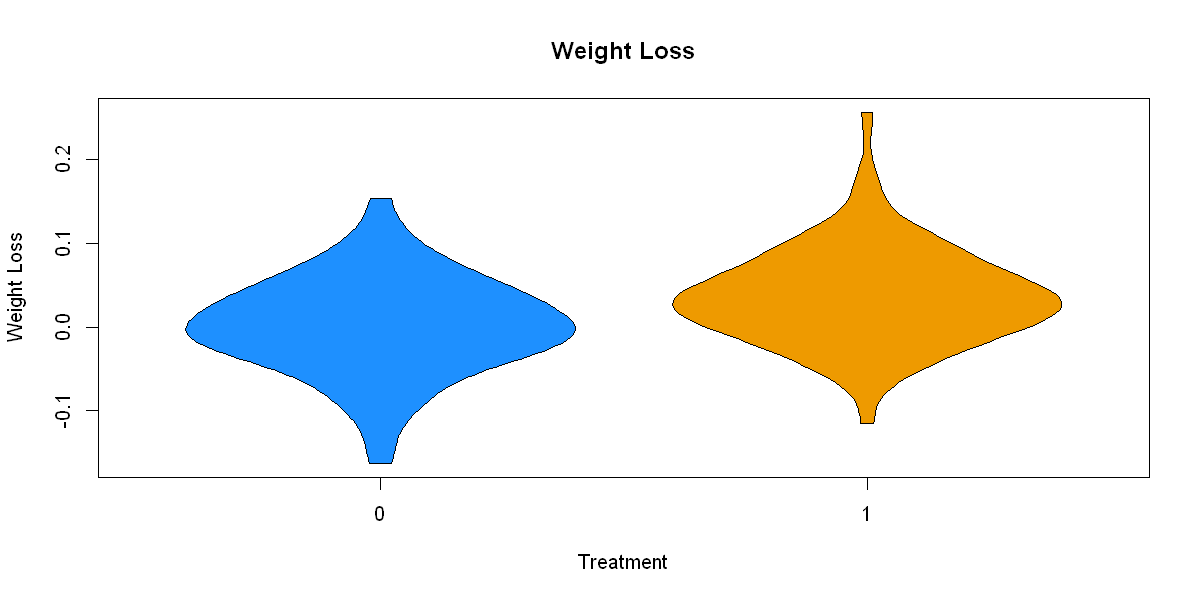

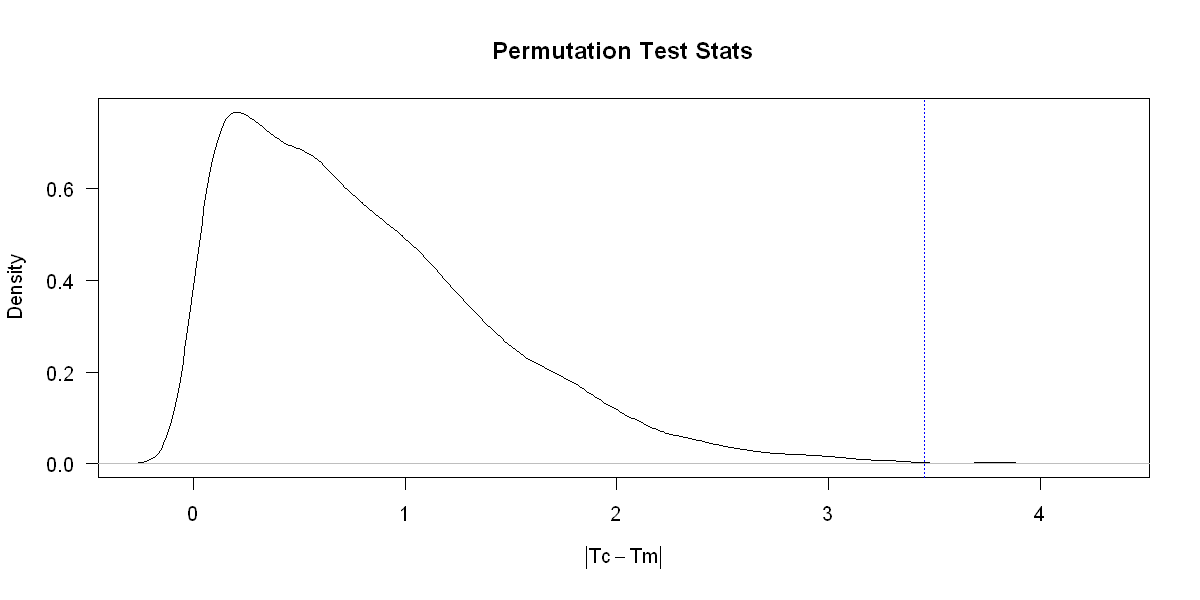

In [13]:
options(repr.plot.width = 10, repr.plot.height = 5)
getPermut(dat$WeightLoss12Month, dat$Treatment, P = 10000, IVname = "Weight Loss")

***We confirmed that the treatment has a statistically significant predictive capability on weight loss outcome.***

#### Regression of App-use (*i.e.*, PC1 ) on the treatment.

In [14]:
# Outcome model with confounders
out.fit <- lm(App1 ~ Treatment + Age, data = dat)
summary(out.fit)


Call:
lm(formula = App1 ~ Treatment + Age, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.4575 -1.4052 -0.1663  1.5675  6.4061 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.26007    0.94555  -2.390   0.0183 *  
Treatment    3.68261    0.39386   9.350 3.94e-16 ***
Age          0.02711    0.02633   1.029   0.3052    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.181 on 127 degrees of freedom
Multiple R-squared:  0.4283,	Adjusted R-squared:  0.4193 
F-statistic: 47.58 on 2 and 127 DF,  p-value: 3.797e-16


#### **Permutation test: App-use ~ treatment assignment**

The mean App-use for intervention is: 2.421557 
The mean App-use for no intervention is: -1.334952 
The absolute t-test statistic is:  10.18506 
Number of permutation sample: 10000 
P-value with t-test for 10000 samples is 0 .


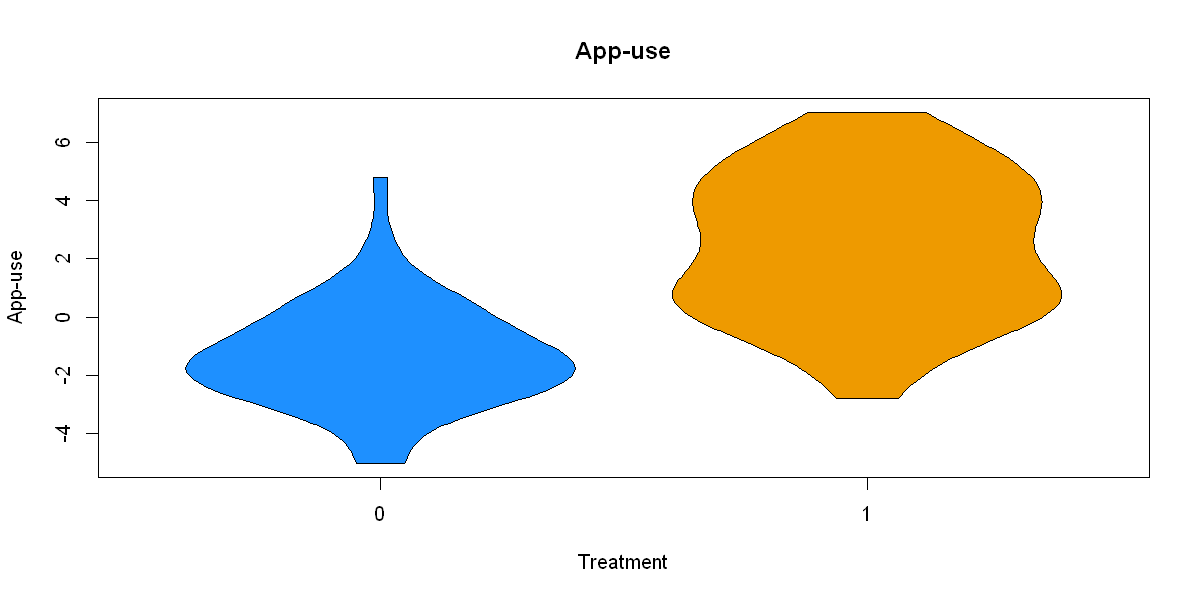

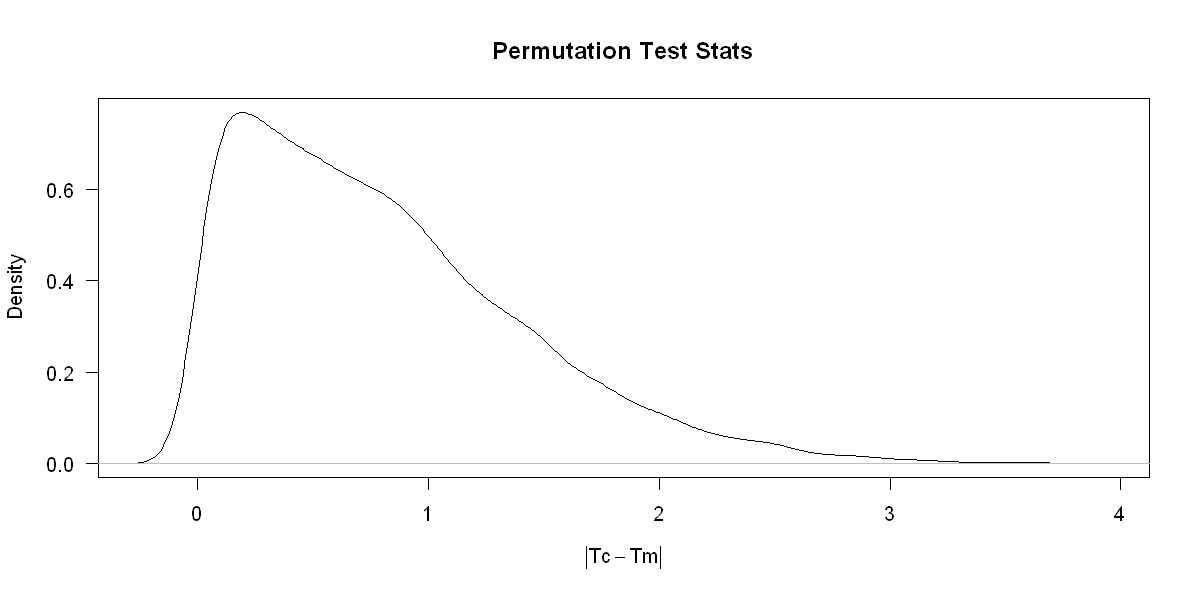

In [15]:
getPermut(dat$App1, dat$Treatment, P = 10000, IVname = "App-use")

#### Regression of App-calories (*i.e.*, PC2 ) on the treatment.

In [16]:
# Outcome model with confounders
out.fit <- lm(App2 ~ Treatment + Age, data = dat)
summary(out.fit)


Call:
lm(formula = App2 ~ Treatment + Age, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.6868 -0.7541 -0.0702  0.9653  4.6857 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept)  0.825825   0.664382   1.243  0.21616   
Treatment   -0.911984   0.276746  -3.295  0.00127 **
Age         -0.007453   0.018502  -0.403  0.68774   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.533 on 127 degrees of freedom
Multiple R-squared:  0.08568,	Adjusted R-squared:  0.07128 
F-statistic:  5.95 on 2 and 127 DF,  p-value: 0.003386


#### **Permutation test: App-calories ~ treatment assignment**

The mean App-calories for intervention is: -0.3608357 
The mean App-calories for no intervention is: 0.5714661 
The absolute t-test statistic is:  3.25049 
Number of permutation sample: 10000 
P-value with t-test for 10000 samples is 0.0014 .


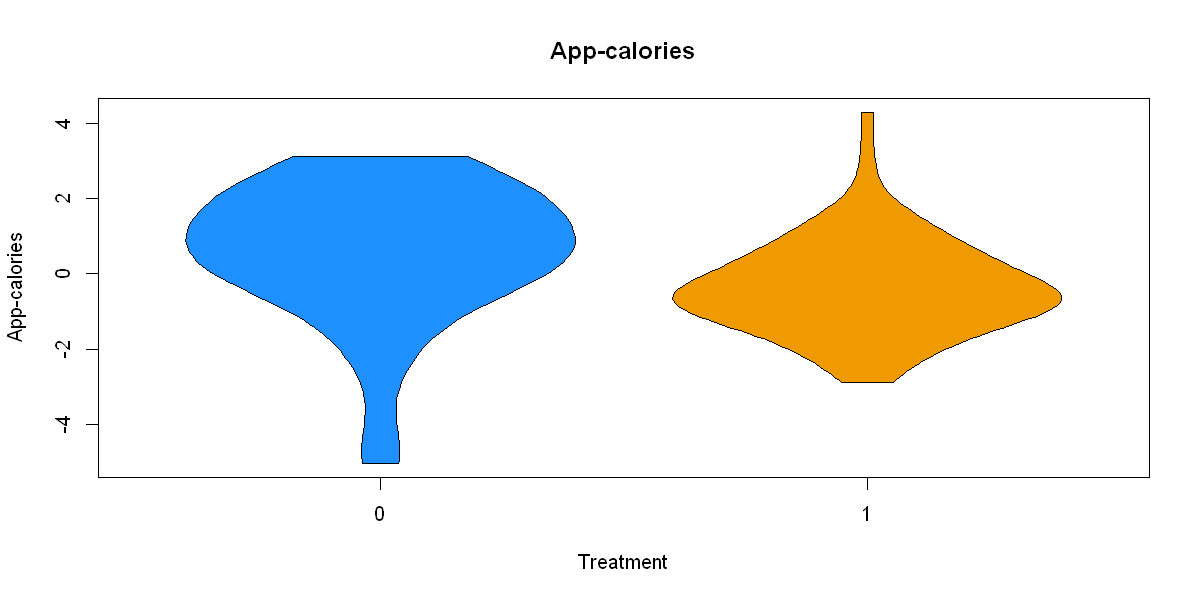

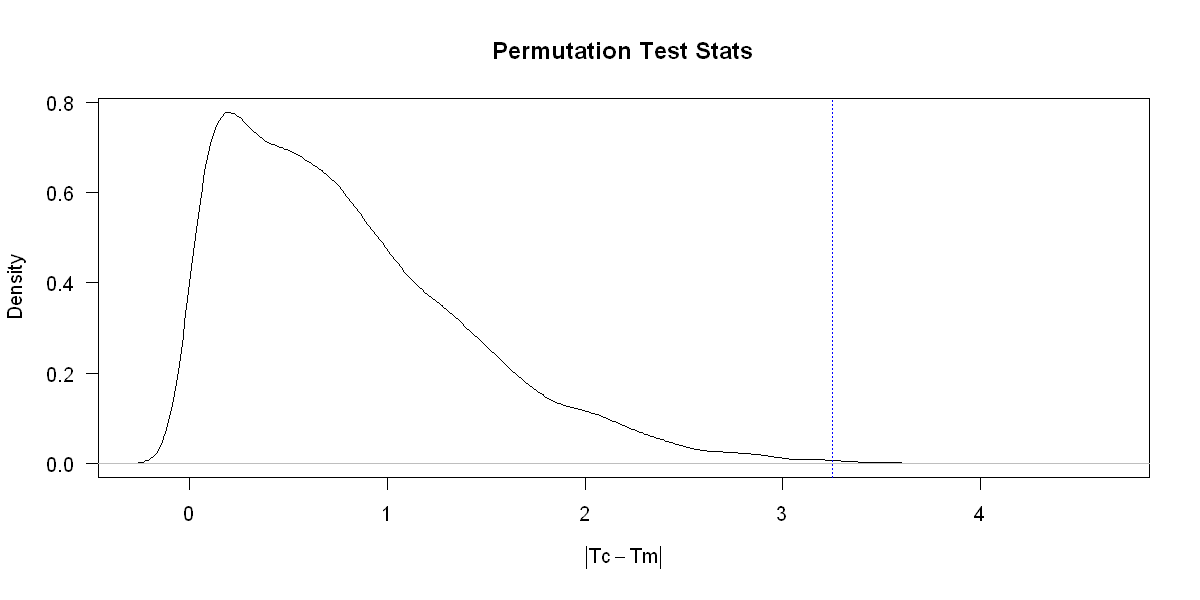

In [17]:
getPermut(dat$App2, dat$Treatment, P = 10000, IVname = "App-calories")

#### Regression of App-exercise (*i.e.*, PC3 ) on the treatment.

In [18]:
# Outcome model with confounders
out.fit <- lm(App3 ~ Treatment + Age, data = dat)
summary(out.fit)


Call:
lm(formula = App3 ~ Treatment + Age, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.0998 -1.0230  0.1562  0.8603  4.2203 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  0.94397    0.53004   1.781   0.0773 .
Treatment    0.05021    0.22079   0.227   0.8205  
Age         -0.02968    0.01476  -2.011   0.0464 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.223 on 127 degrees of freedom
Multiple R-squared:  0.03101,	Adjusted R-squared:  0.01575 
F-statistic: 2.032 on 2 and 127 DF,  p-value: 0.1353


#### **Permutation test: App-exercise ~ treatment assignment**

The mean App-exercise for intervention is: -0.09979518 
The mean App-exercise for no intervention is: -0.06907967 
The absolute t-test statistic is:  0.146207 
Number of permutation sample: 10000 
P-value with t-test for 10000 samples is 0.8777 .


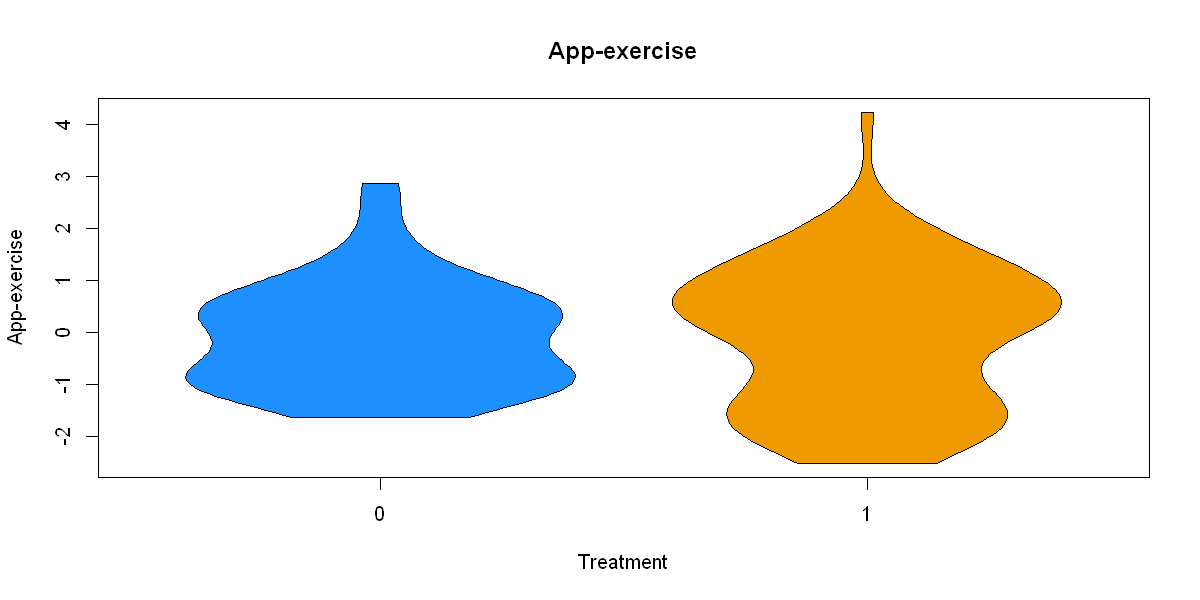

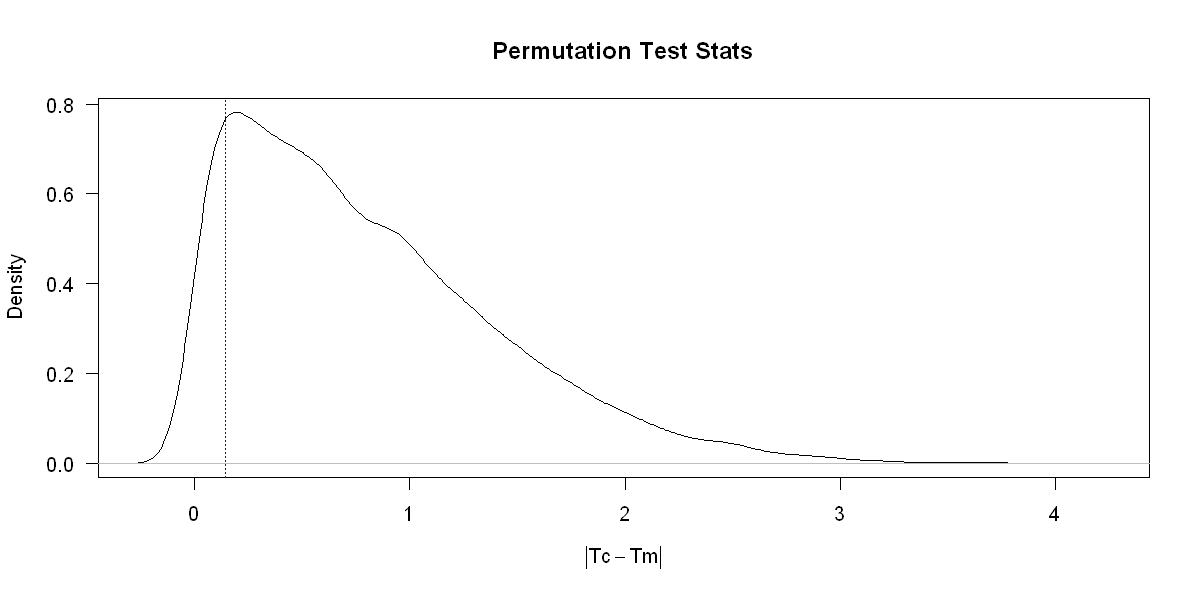

In [19]:
getPermut(dat$App3, dat$Treatment, P = 10000, IVname = "App-exercise")

From the regression model and from the permutation test, we observe that the effect of the treatment assignment on the App-exercise is not significant (0.88). Since an effect of treatment assignment onto the mediator is a prerequisite for mediation being possible, app-exercice variable is not eligible to be considered as a mediator.

#### **Regression of Self-weight on the treatment.**

In [20]:
# Outcome model with confounders
out.fit <- lm(NumWeigh ~ Treatment + Age, data = dat)
summary(out.fit)


Call:
lm(formula = NumWeigh ~ Treatment + Age, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-208.57  -60.38  -10.57   56.17  180.53 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 119.7862    35.6641   3.359  0.00103 ** 
Treatment    77.7137    14.8558   5.231 6.75e-07 ***
Age           0.3909     0.9932   0.394  0.69453    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 82.28 on 127 degrees of freedom
Multiple R-squared:  0.1872,	Adjusted R-squared:  0.1744 
F-statistic: 14.62 on 2 and 127 DF,  p-value: 1.929e-06


#### **Permutation test: Self-weight ~ treatment assignment**

The mean Self-weighing for intervention is: 211.9067 
The mean Self-weighing for no intervention is: 133.1273 
The absolute t-test statistic is:  5.383558 
Number of permutation sample: 10000 
P-value with t-test for 10000 samples is 0 .


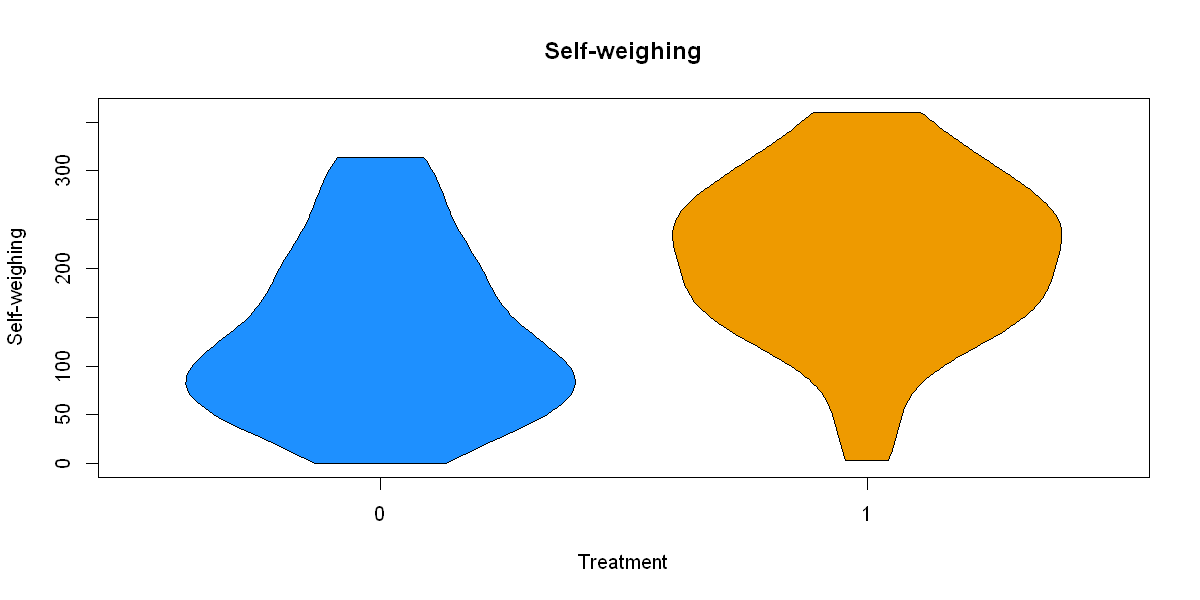

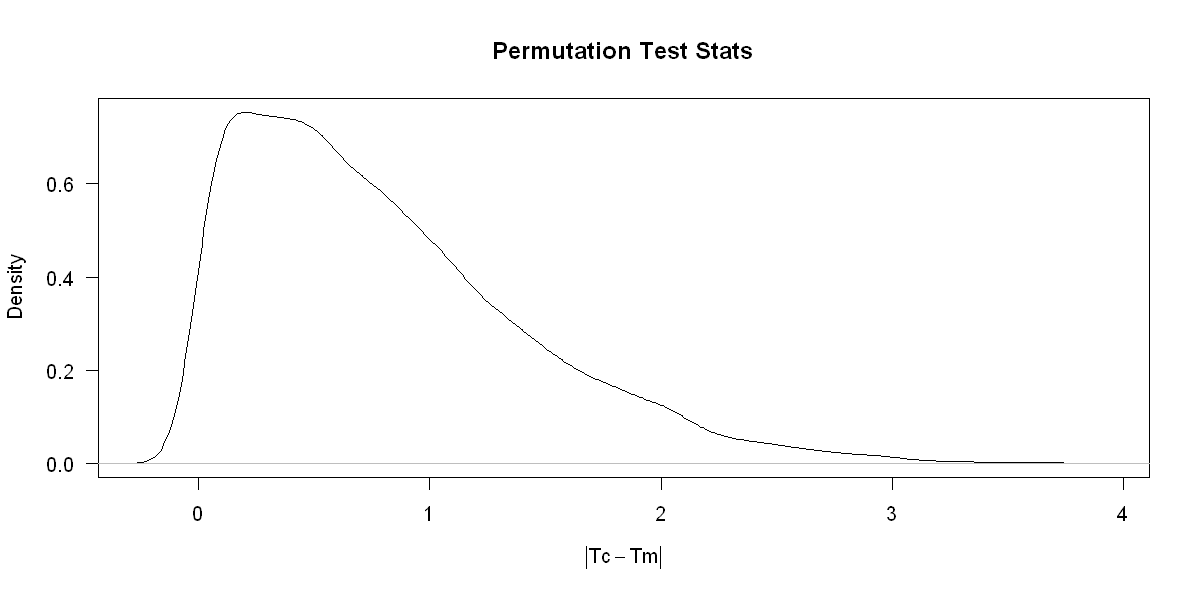

In [21]:
getPermut(dat$NumWeigh, dat$Treatment, P = 10000, IVname = "Self-weighing")

#### **Regression of 4-month weight loss on the treatment.**

In [22]:
# Outcome model with confounders
out.fit <- lm(WeightLoss4Month ~ Treatment + Age, data = dat)
summary(out.fit)


Call:
lm(formula = WeightLoss4Month ~ Treatment + Age, data = dat)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.072002 -0.024023 -0.005307  0.015075  0.167338 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.0019456  0.0168705  -0.115    0.908    
Treatment    0.0399147  0.0070273   5.680 8.73e-08 ***
Age          0.0003358  0.0004698   0.715    0.476    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.03892 on 127 degrees of freedom
Multiple R-squared:  0.2181,	Adjusted R-squared:  0.2058 
F-statistic: 17.71 on 2 and 127 DF,  p-value: 1.638e-07


#### **Permutation test: 4-month weight loss ~ treatment assignment**

The mean 4-month weight loss for intervention is: 0.05034562 
The mean 4-month weight loss for no intervention is: 0.009515432 
The absolute t-test statistic is:  6.082718 
Number of permutation sample: 10000 
P-value with t-test for 10000 samples is 0 .


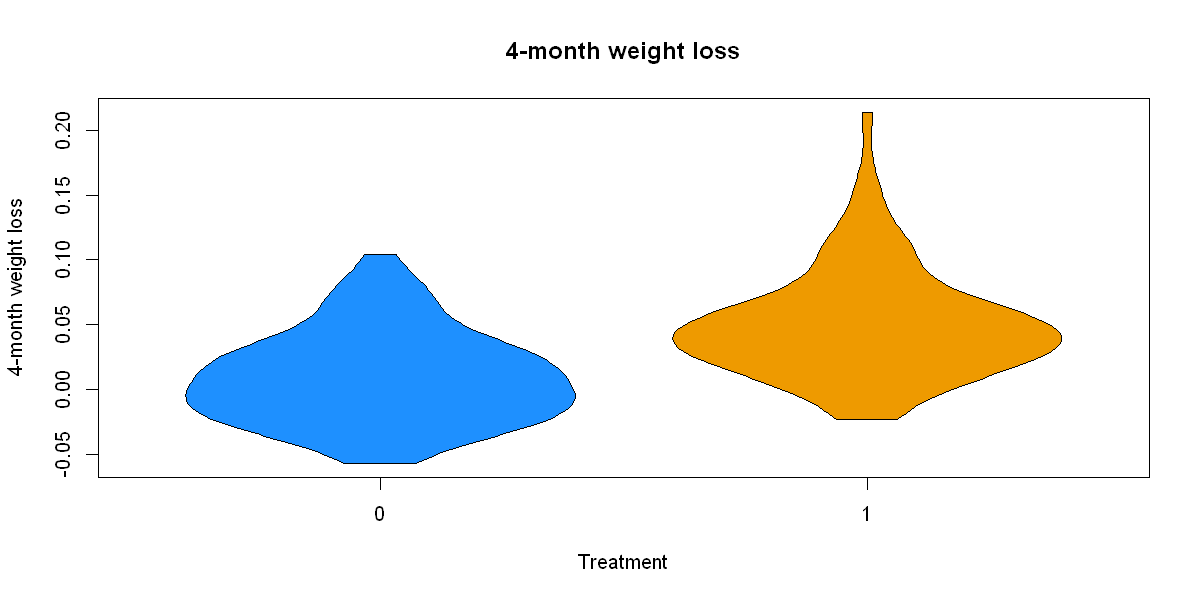

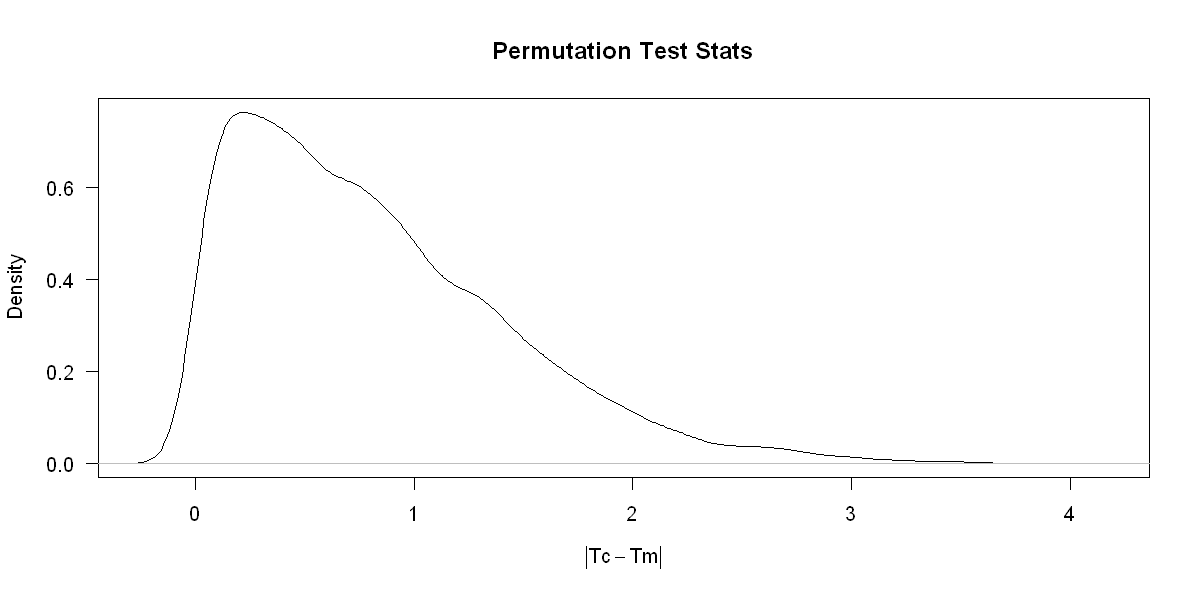

In [23]:
getPermut(dat$WeightLoss4Month, dat$Treatment, P = 10000, IVname = "4-month weight loss")

***We confirmed that the treatment has a statistically significant predictive capability on all potential mediators except for the app-exercise. Since app-use variable (i.e., PC1) explained more than 55% of the variance, we considered only app-use, self-weight and the 4-month weight loss variables for the mediation analysis for the 12 month-weight loss.***

---
## Mediation

**Our function `getMediationTable` to estimate the Average Causal Mediation Effect (ACME) and the Average Direct Effect (ADE) associated with each mediator is based on  the `mediation` library.**

In [24]:
numFile <- 2
# rslts <- getMediationTable(dat, numFile, myRobustSE = TRUE, numSims = 10000, confLvl = 0.90) 
rslts <- getMediationTable(dat, numFile, myBoot = TRUE, numSims = 10000, confLvl = 0.90)

Running nonparametric bootstrap


Running nonparametric bootstrap


Running nonparametric bootstrap


Running nonparametric bootstrap




### **Mediation Results** 


In [25]:
rslts$med.tbl %>% round(4)%>%
  kable("html") %>% 
  column_spec(c(1), bold = T, color = "black") %>%
  column_spec(c(2, 5, 8), bold = T, color = "steelblue") %>%
  column_spec(c(3, 4, 6, 7, 9, 10), bold = T, color = "sienna") %>%
  column_spec(c(11), bold = T, color = "black")%>%
  as.character() %>%
  display_html()

,Total Effect,Lower CI,Upper CI,ADE,Lower CI,Upper CI,ACME,Lower CI,Upper CI,Prop. Mediated
App-use,0.0316,0.0148,0.0479,0.0160,-0.0068,0.0380,0.0156,0.0004,0.0323,0.4928
App-Cal,0.0316,0.0149,0.0482,0.0303,0.0122,0.0482,0.0013,-0.0039,0.0082,0.0406
Self-weight,0.0316,0.0152,0.0481,0.0166,0.0014,0.0318,0.0150,0.0066,0.0242,0.4737
4 Months Weight Loss,0.0316,0.0150,0.0478,0.0017,-0.0134,0.0160,0.0299,0.0184,0.0426,0.9477


---
## Sensitivity Analysis

In [26]:
# Sensitivity for the 4-month weight loss
sens4Month.out <- medsens(rslts$med.rslts$med4Month.out, rho.by = 0.01, effect.type = "indirect", sims = 10000)

In [27]:
# Sensitivity for the app-use
sensApp.out <- medsens(rslts$med.rslts$medApp.out, rho.by = 0.01, effect.type = "indirect", sims = 10000)
# Sensitivity for the self-weight
sensNumW.out <- medsens(rslts$med.rslts$medNumW.out, rho.by = 0.01, effect.type = "indirect", sims = 10000)

### 4-month weight loss

#### Results

In [28]:
summary(sens4Month.out)


Mediation Sensitivity Analysis for Average Causal Mediation Effect

Sensitivity Region

       Rho    ACME 90% CI Lower 90% CI Upper R^2_M*R^2_Y* R^2_M~R^2_Y~
 [1,] 0.42  0.0069      -0.0006       0.0144       0.1764       0.0902
 [2,] 0.43  0.0062      -0.0012       0.0137       0.1849       0.0945
 [3,] 0.44  0.0056      -0.0018       0.0129       0.1936       0.0990
 [4,] 0.45  0.0049      -0.0025       0.0122       0.2025       0.1035
 [5,] 0.46  0.0042      -0.0031       0.0115       0.2116       0.1082
 [6,] 0.47  0.0034      -0.0038       0.0107       0.2209       0.1129
 [7,] 0.48  0.0027      -0.0045       0.0100       0.2304       0.1178
 [8,] 0.49  0.0020      -0.0052       0.0092       0.2401       0.1227
 [9,] 0.50  0.0012      -0.0060       0.0084       0.2500       0.1278
[10,] 0.51  0.0004      -0.0068       0.0076       0.2601       0.1329
[11,] 0.52 -0.0003      -0.0075       0.0069       0.2704       0.1382
[12,] 0.53 -0.0012      -0.0084       0.0061       0.2809  

#### Sensitivity with respect to error correlation

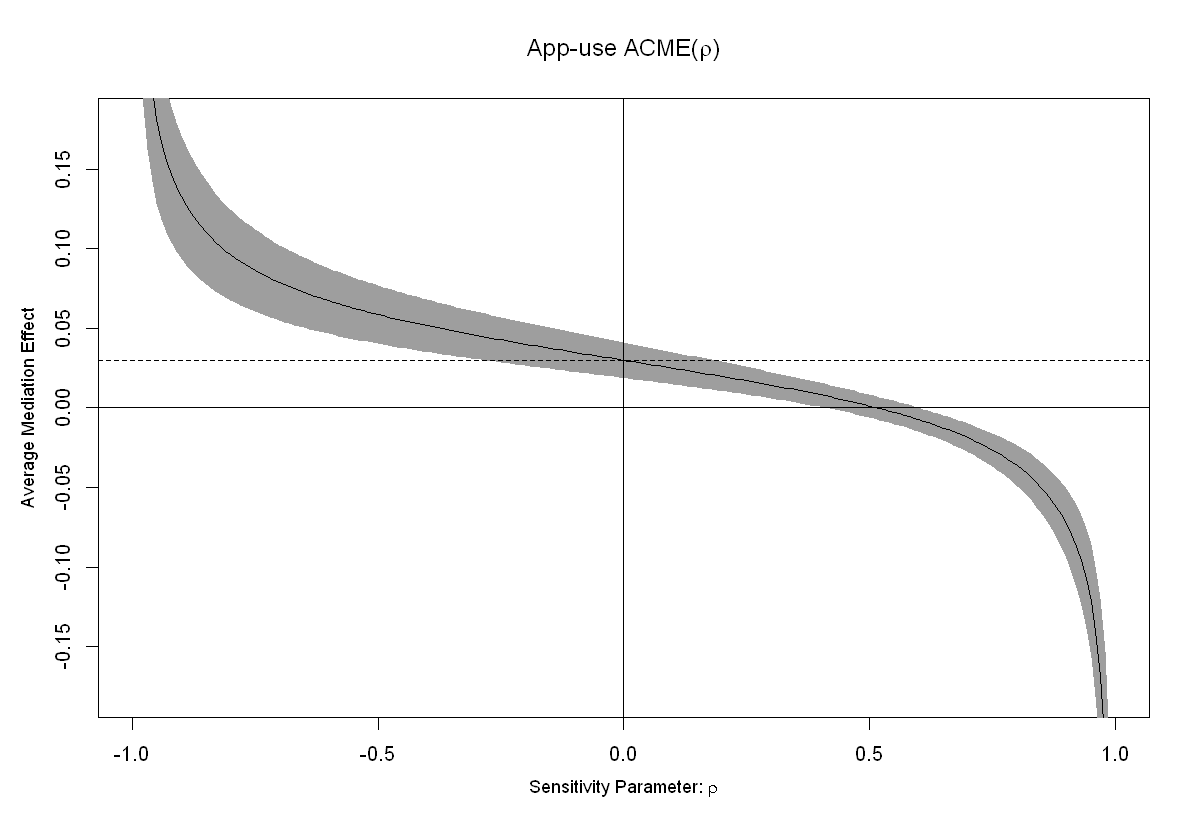

In [29]:
options(repr.plot.width = 10, repr.plot.height = 7)
plot(sens4Month.out,  ylim = c(-0.18, 0.18), main  =  expression(paste("App-use ACME(", rho, ")")))

The above figure shows the estimated true values of ACMEs as a function of the sensitivity parameter $\rho$. The parameter $\rho$
expresses the correlation between the error terms in the mediator and the outcome models. The solid thick line and its shaded area represent the ACME's point estimates and their 90% confidence intervals, respectively.    
According to this analysis, the ACME is estimated to be negative when  $\rho$ is larger than 0.52, and the ACME is statistically indistinguishable from zero at the 90% level when the parameter $\rho$ is larger than 0.42 and less 0.60.

#### Sensitivity with respect to proportion of variance explained

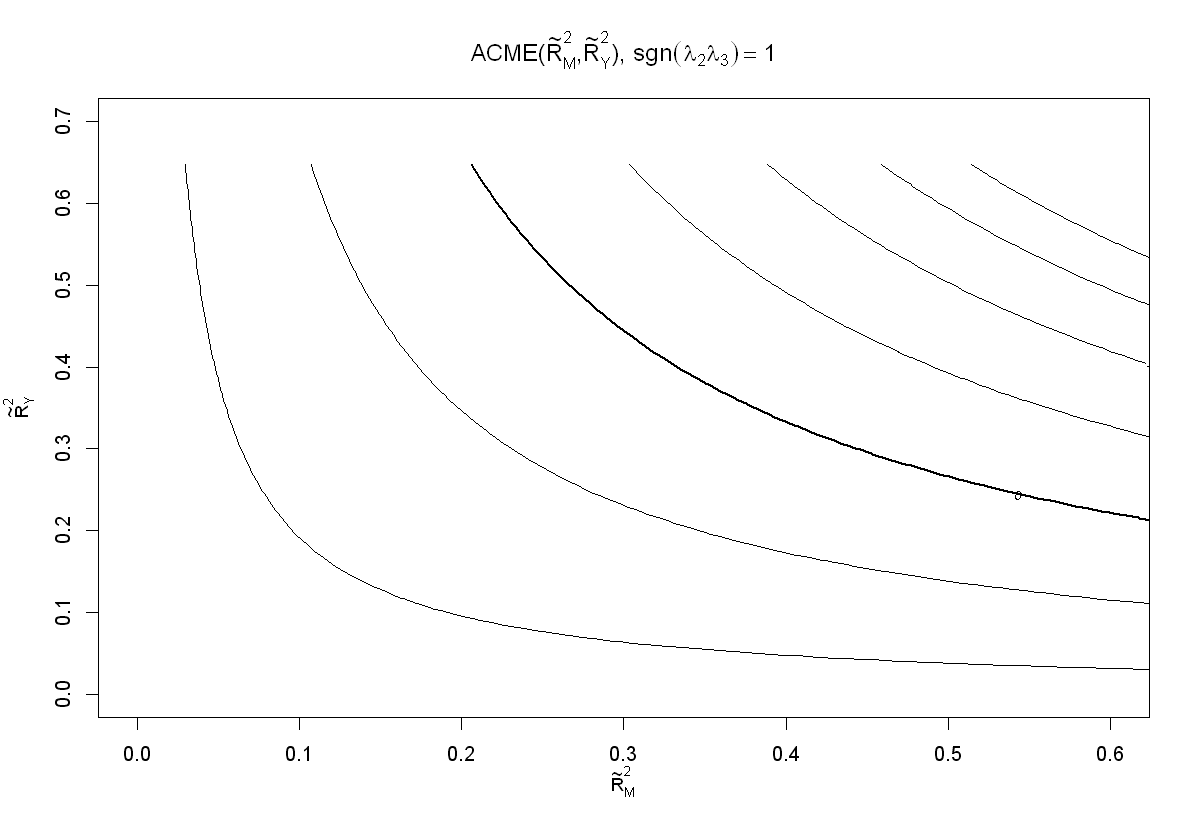

In [30]:
plot(sens4Month.out, sens.par = "R2", r.type = "total", sign.prod = "positive",
     xlim = c(-0.0, 0.6), ylim = c(-0.0, 0.7))

In the sensitivity analyses plot above, the ACME estimates are plotted as contour lines against $\tilde{R}^2_Y \tilde{R}^2_M$, the proportions of the total variance in the outcome and mediator variables, respectively, that would be explained by a hypothetical unobserved pretreatment confounder.
The bold line represents the various product combinations in terms of the coefficient of determination where the ACME would become 0. In this case, the estimated ACME will be 0 if the product of $\tilde{R}^2_M$ and $\tilde{R}^2_Y$ is 0.1382. For example, this implies that an unobserved pretreatment confounder would explain 20% of the variation in the participants’ 4-month weight loss and 69.1% of the variation in their 12-month weight loss.

### App-use

#### Results

In [31]:
summary(sensApp.out)


Mediation Sensitivity Analysis for Average Causal Mediation Effect

Sensitivity Region

       Rho    ACME 90% CI Lower 90% CI Upper R^2_M*R^2_Y* R^2_M~R^2_Y~
 [1,] 0.02  0.0137      -0.0002       0.0275       0.0004       0.0002
 [2,] 0.03  0.0127      -0.0011       0.0266       0.0009       0.0004
 [3,] 0.04  0.0118      -0.0020       0.0256       0.0016       0.0008
 [4,] 0.05  0.0108      -0.0029       0.0246       0.0025       0.0012
 [5,] 0.06  0.0099      -0.0039       0.0236       0.0036       0.0018
 [6,] 0.07  0.0089      -0.0048       0.0227       0.0049       0.0024
 [7,] 0.08  0.0080      -0.0057       0.0217       0.0064       0.0032
 [8,] 0.09  0.0070      -0.0067       0.0207       0.0081       0.0040
 [9,] 0.10  0.0061      -0.0076       0.0198       0.0100       0.0050
[10,] 0.11  0.0051      -0.0085       0.0188       0.0121       0.0060
[11,] 0.12  0.0042      -0.0095       0.0178       0.0144       0.0071
[12,] 0.13  0.0032      -0.0105       0.0169       0.0169  

#### Sensitivity with respect to error correlation

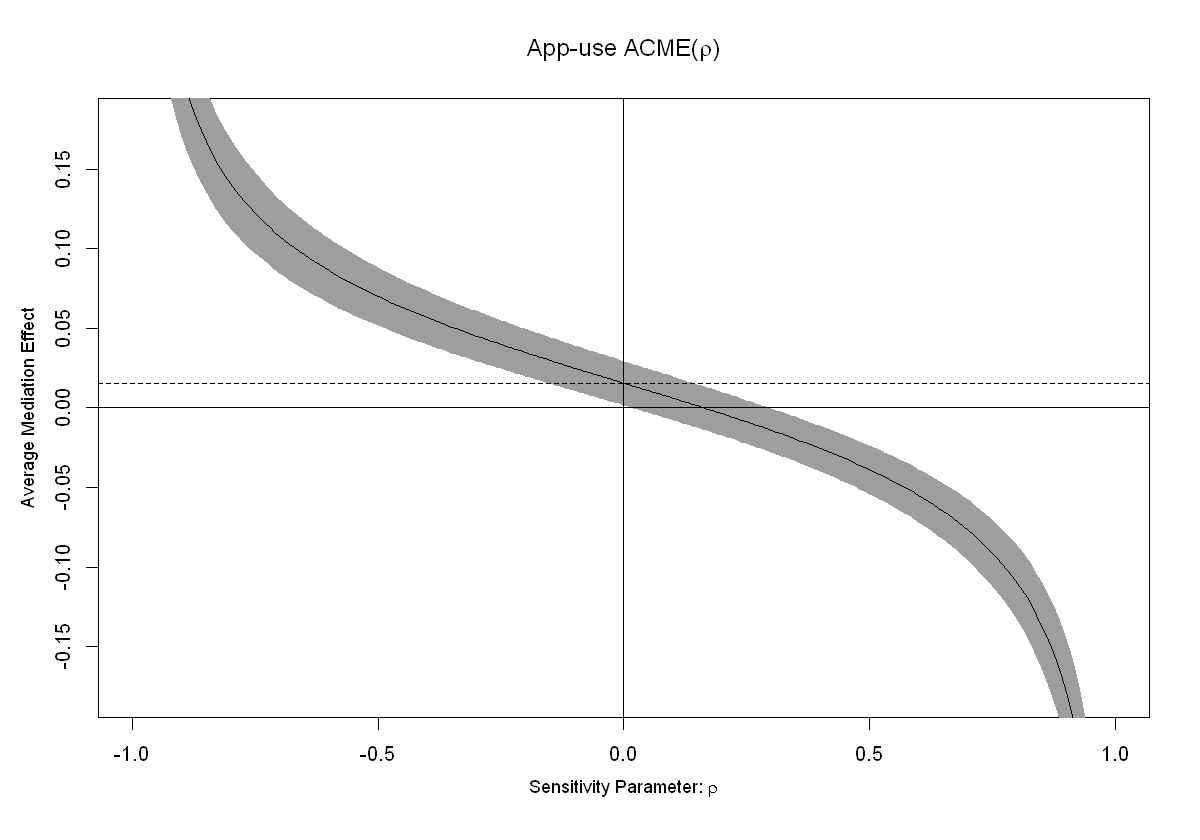

In [32]:
options(repr.plot.width = 10, repr.plot.height = 7)
plot(sensApp.out,  ylim = c(-0.18, 0.18), main  =  expression(paste("App-use ACME(", rho, ")")))

The above figure shows the estimated true values of ACMEs as a function of the sensitivity parameter $\rho$. The parameter $\rho$
expresses the correlation between the error terms in the mediator and the outcome models. The solid thick line and its shaded area represent the ACME's point estimates and their 90% confidence intervals, respectively.    
According to this analysis, the ACME is estimated to be negative when  $\rho$ is larger than 0.16, and the ACME is statistically indistinguishable from zero at the 90% level when the parameter $\rho$ is larger than 0.01 and less than 0.30.

#### Sensitivity with respect to proportion of variance explained

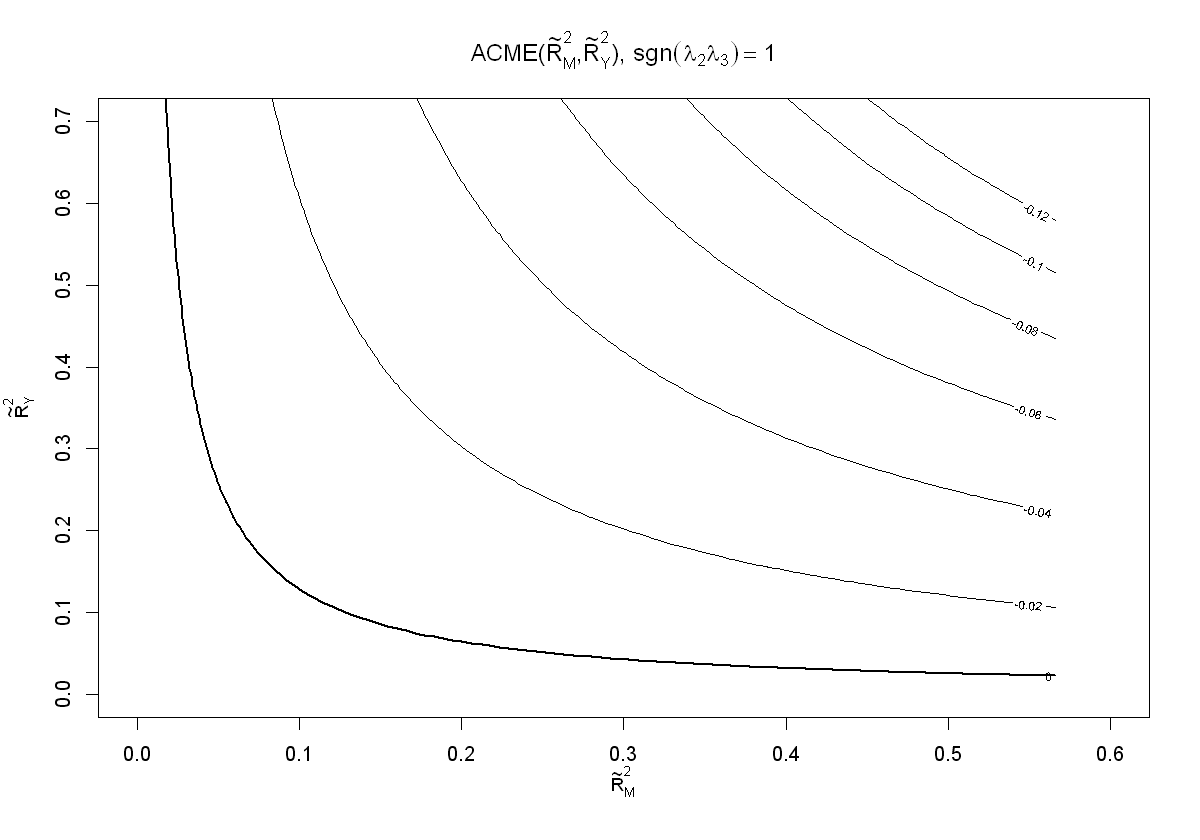

In [33]:
plot(sensApp.out, sens.par = "R2", r.type = "total", sign.prod = "positive",
     xlim = c(-0.0, 0.6), ylim = c(-0.0, 0.7))

In the sensitivity analyses plot above, the ACME estimates are plotted against $\tilde{R}^2_Y \tilde{R}^2_M$, the proportions of the total variance in the outcome and mediator variables, respectively, that would be explained by a hypothetical unobserved pretreatment confounder.
The bold line represents the various product combinations in terms of the coefficient of determination where the ACME would become 0. In this case, the estimated ACME will be 0 if the product of $\tilde{R}^2_M$ and $\tilde{R}^2_Y$ is 0.0127. For example, this implies that an unobserved pretreatment confounder would explain 20% of the variation in the participants’ app-use and 6.3% of the variation in their weight loss.


### Self-weight

#### Results

In [34]:
summary(sensNumW.out)


Mediation Sensitivity Analysis for Average Causal Mediation Effect

Sensitivity Region

       Rho    ACME 90% CI Lower 90% CI Upper R^2_M*R^2_Y* R^2_M~R^2_Y~
 [1,] 0.14  0.0077      -0.0001       0.0155       0.0196       0.0131
 [2,] 0.15  0.0072      -0.0006       0.0149       0.0225       0.0150
 [3,] 0.16  0.0066      -0.0011       0.0144       0.0256       0.0171
 [4,] 0.17  0.0061      -0.0016       0.0138       0.0289       0.0193
 [5,] 0.18  0.0056      -0.0021       0.0132       0.0324       0.0216
 [6,] 0.19  0.0050      -0.0026       0.0126       0.0361       0.0241
 [7,] 0.20  0.0045      -0.0031       0.0120       0.0400       0.0267
 [8,] 0.21  0.0039      -0.0036       0.0115       0.0441       0.0294
 [9,] 0.22  0.0034      -0.0041       0.0109       0.0484       0.0323
[10,] 0.23  0.0028      -0.0046       0.0103       0.0529       0.0353
[11,] 0.24  0.0023      -0.0052       0.0097       0.0576       0.0384
[12,] 0.25  0.0017      -0.0057       0.0092       0.0625  

#### Sensitivity with respect to error correlation

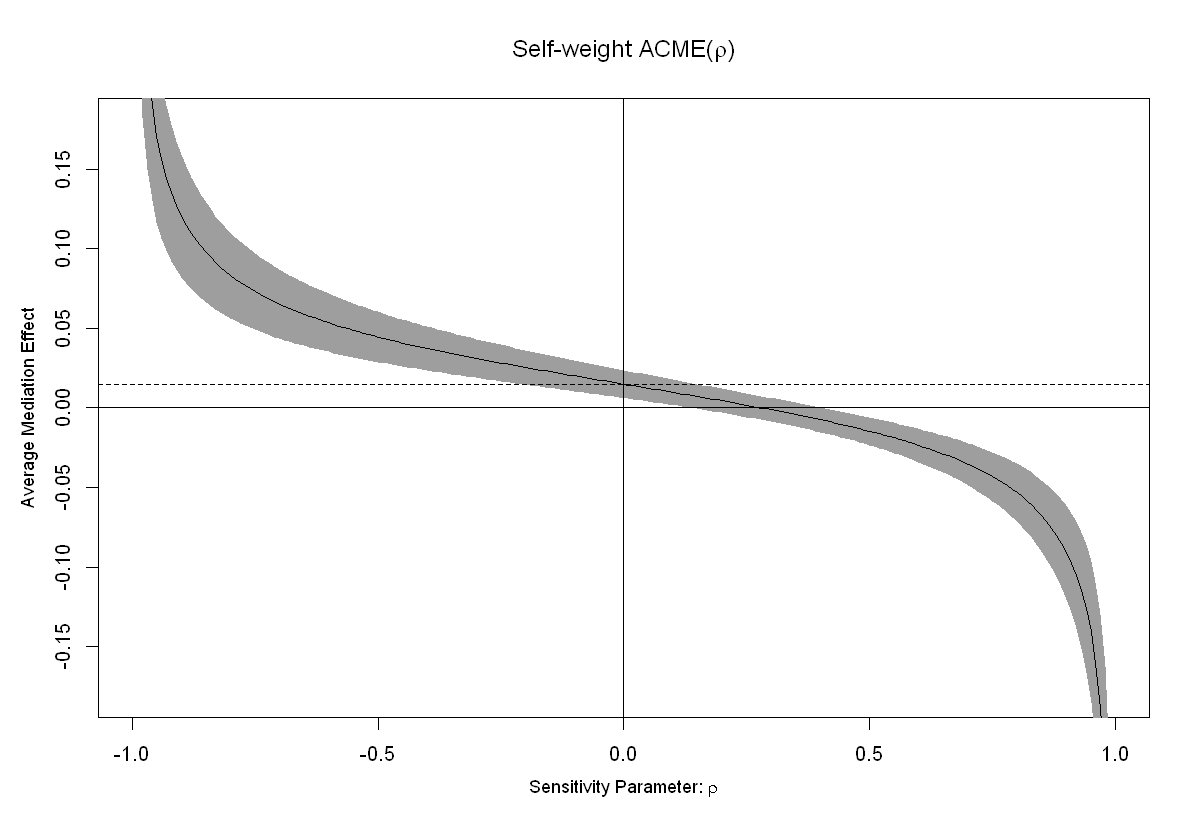

In [35]:
plot(sensNumW.out,  ylim = c(-0.18, 0.18), main  =  expression(paste("Self-weight ACME(", rho, ")")))

The above figure shows the estimated true values of ACMEs as a function of the sensitivity parameter $\rho$. The parameter $\rho$
expresses the correlation between the error terms in the mediator and the outcome models. The solid thick line and its shaded area represent the ACME's point estimates and their 90% confidence intervals, respectively.    
According to this analysis, the ACME is estimated to be negative when  $\rho$ is larger than 0.28, and the ACME is statistically indistinguishable from zero at the 90% level when the parameter $\rho$ is larger than 0.14 and less than 0.4.

### Sensitivity with respect to proportion of variance explained

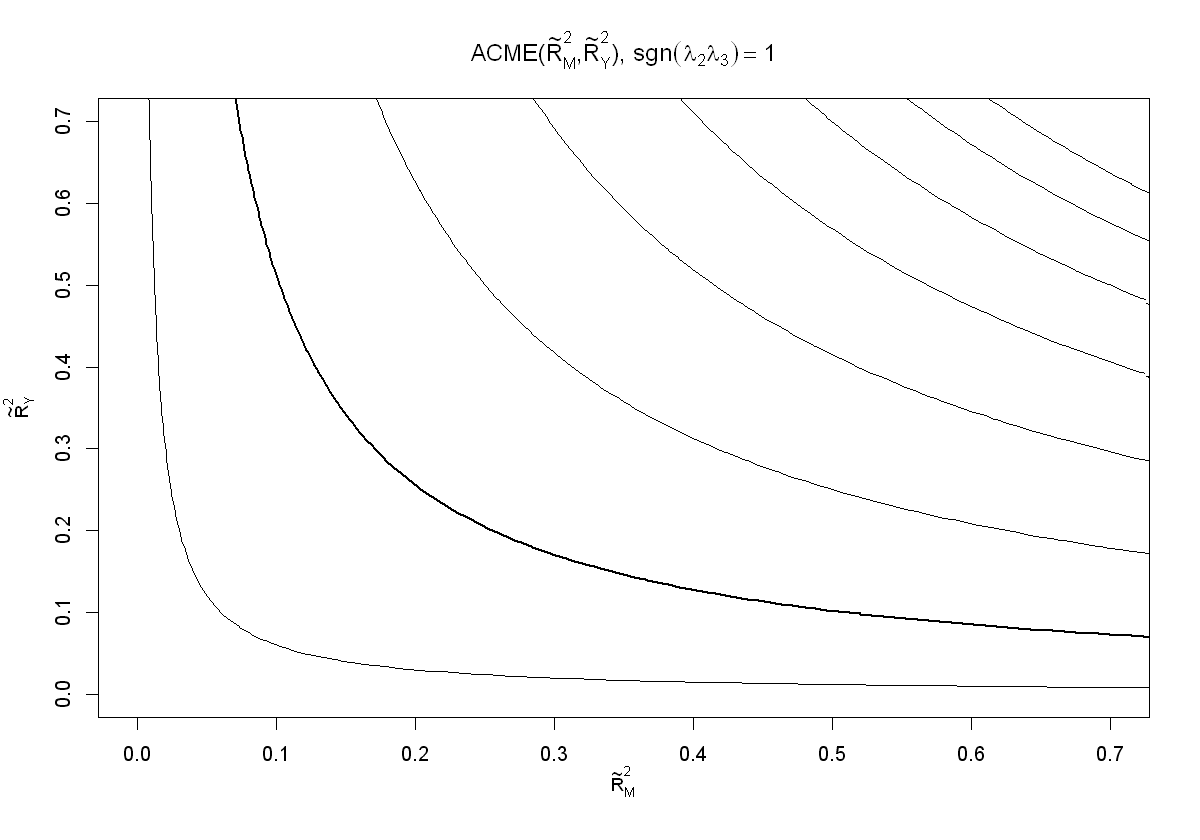

In [36]:
plot(sensNumW.out, sens.par = "R2", r.type = "total", sign.prod = "positive",
     xlim = c(-0.0, 0.7), ylim = c(-0.0, 0.7))

In the sensitivity analyses plot above, the ACME estimates are plotted as contour lines against $\tilde{R}^2_Y \tilde{R}^2_M$, the proportions of the total variance in the outcome and mediator variables, respectively, that would be explained by a hypothetical unobserved pretreatment confounder.
The bold line represents the various product combinations in terms of the coefficient of determination where the ACME would become 0. In this case, the estimated ACME will be 0 if the product of $\tilde{R}^2_M$ and $\tilde{R}^2_Y$ is 0.0523. For example, this implies that an unobserved pretreatment confounder would explain 20% of the variation in the participants’ app-calories and 26.1% of the variation in their weight loss.

## Conclusion

Overall, the results suggest that under the assumption of independence between mechanisms, the causal mediation effects are positive and not significant for the app-use and it is significant for the self weight and for the 4-month weight loss mediator, and the estimates for the 4-month weight loss showed robustness to the
possible unobserved pretreatment mediator–outcome confounding to varying degrees. However, the estimates for app-use are not robust to the
possible unobserved pretreatment mediator–outcome confounding to varying degrees. The results of the mediation analysis showed that there are no sufficient evidence to detect a mediation effect from the app-calories variable.   

In [37]:
sessionInfo()

R version 4.0.5 (2021-03-31)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 10 x64 (build 19042)

Matrix products: default

locale:
[1] LC_COLLATE=English_United States.1252 
[2] LC_CTYPE=English_United States.1252   
[3] LC_MONETARY=English_United States.1252
[4] LC_NUMERIC=C                          
[5] LC_TIME=English_United States.1252    

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] vioplot_0.3.5     zoo_1.8-8         sm_2.2-5.6        IRdisplay_1.0    
 [5] kableExtra_1.3.4  mosaic_1.8.3      ggridges_0.5.3    mosaicData_0.20.2
 [9] ggformula_0.10.1  ggstance_0.3.5    lattice_0.20-41   mediation_4.5.0  
[13] sandwich_3.0-0    mvtnorm_1.1-1     Matrix_1.3-2      MASS_7.3-53.1    
[17] corrplot_0.84     factoextra_1.0.7  FactoMineR_2.4    forcats_0.5.1    
[21] stringr_1.4.0     purrr_0.3.4       readr_1.4.0       tidyr_1.1.2      
[25] tibble_3.1.1      ggplot2_3.3.3     tidyver